# Smart Inventory Business Analytics


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from database.dao.db_config import DB_CONFIG

user = DB_CONFIG['USER']
password = DB_CONFIG['PASSWORD']
host = DB_CONFIG['HOST']
db_name = DB_CONFIG['NAME']

url = f"mysql+mysqlconnector://{user}:{password}@{host}/{db_name}"
engine = create_engine(url)

print("Connected to the local database")


Connected to the local database


### Data export from database to CSV

In [2]:
with engine.connect() as conn:
    p = pd.read_sql("SELECT * FROM products", conn)
    c = pd.read_sql("SELECT * FROM customers", conn)
    o = pd.read_sql("SELECT * FROM orders", conn)
    i = pd.read_sql("SELECT * FROM order_items", conn)

p.to_csv('products.csv')
c.to_csv('customers.csv')
o.to_csv('orders.csv')
i.to_csv('order_items.csv')
print("Done saving data")

Done saving data


### Load Data from CSV

In [3]:
df_products = pd.read_csv('products.csv')
df_customers = pd.read_csv('customers.csv')
df_orders = pd.read_csv('orders.csv')
df_items = pd.read_csv('order_items.csv')

print("Done loading from CSV")

Done loading from CSV


### 1. Data Extraction & Preparation

In [4]:
df_merged = pd.merge(df_items, df_products, left_on='product_id', right_on='id')

df_all = pd.merge(df_merged, df_orders, left_on='order_id', right_on='id')

df_all['total_line'] = df_all['quantity'] * df_all['price']

df_all['order_date'] = pd.to_datetime(df_all['order_date'])
df_all['month'] = df_all['order_date'].dt.strftime('%Y-%m')

print("Everything is ready for charts")

Everything is ready for charts


### 2. Total Revenue per Month

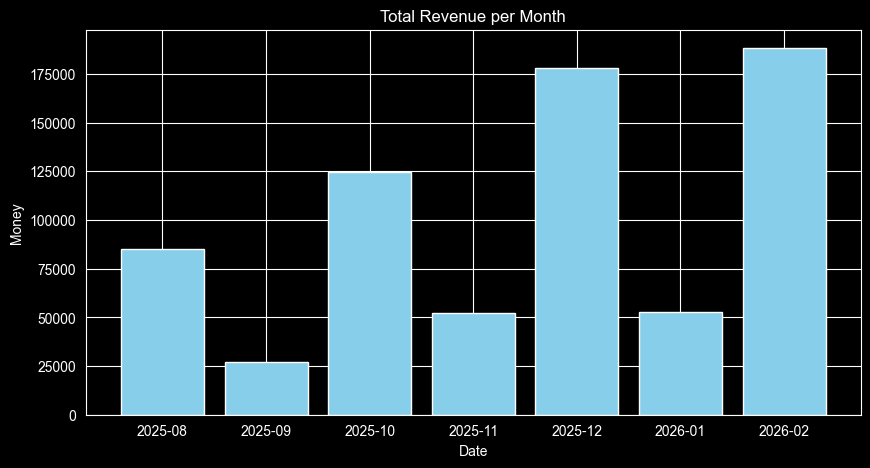

In [5]:
monthly = df_all.groupby('month')['total_line'].sum()

plt.figure(figsize=(10, 5))
plt.bar(monthly.index, monthly.values, color='skyblue')
plt.title('Total Revenue per Month')
plt.xlabel('Date')
plt.ylabel('Money')
plt.show()

### 3. Best Selling Products

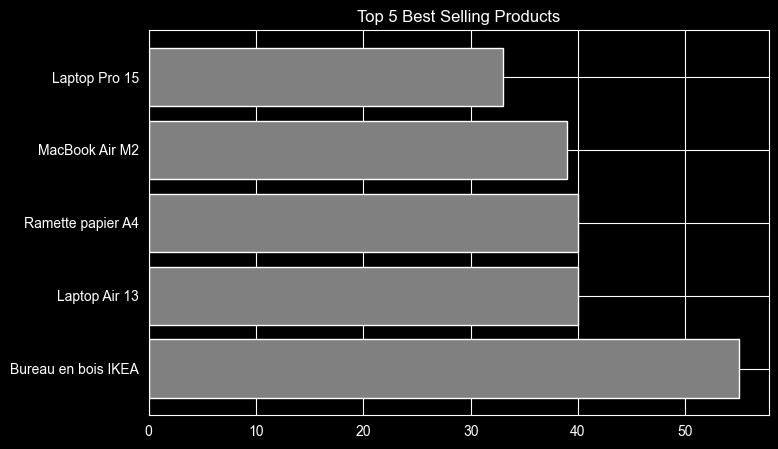

In [6]:
top5 = df_all.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.barh(top5.index, top5.values, color='grey')
plt.title('Top 5 Best Selling Products')
plt.show()

### 4. Average Order Value Distribution

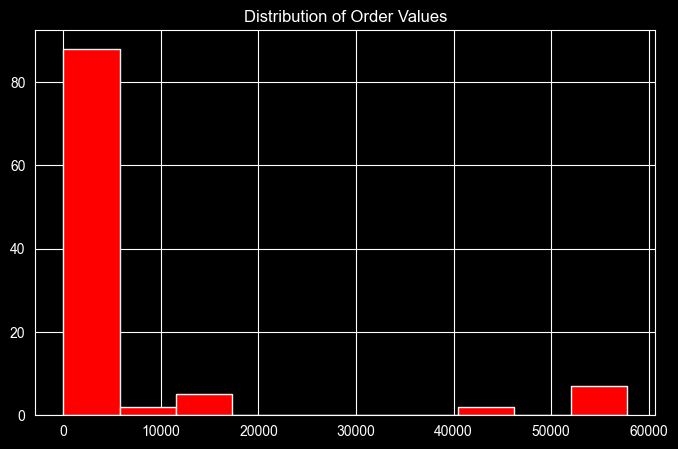

Average Order Value:  6810.587884615385


In [7]:
order_sums = df_all.groupby('order_id')['total_line'].sum()

plt.figure(figsize=(8, 5))
plt.hist(order_sums, bins=10, color='red')
plt.title('Distribution of Order Values')
plt.show()

print("Average Order Value: ", order_sums.mean())

### 5. Customer Purchase Frequency

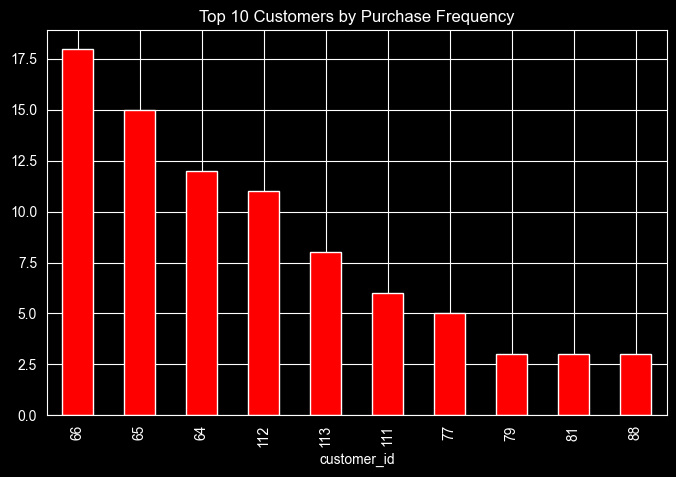

In [8]:
freq = df_orders['customer_id'].value_counts().head(10)

plt.figure(figsize=(8, 5))
freq.plot(kind='bar', color='red')
plt.title('Top 10 Customers by Purchase Frequency')
plt.show()